<a href="https://colab.research.google.com/github/pherie/tesis/blob/master/pengenalan_wajah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pwd

/content/pengenalanwajah


In [0]:
!dir

orangtu-embeddings.npz	orangtu.npz


In [0]:
!mkdir pengenalanwajah

In [0]:
cd pengenalanwajah

/content/pengenalanwajah


In [0]:
from numpy import load, expand_dims
from sklearn.preprocessing import Normalizer, LabelEncoder
from sklearn.svm import SVC
from random import choice
from matplotlib import pyplot

Predicted: rofik (78.046)
Expected: rofik


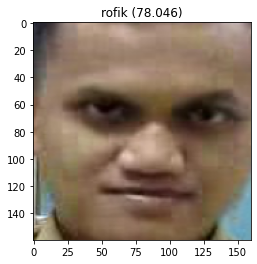

In [0]:
# load faces
data = load('orangtu.npz')
testX_faces = data['arr_2']

# load face embeddings
data = load('orangtu-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']

# normalize input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)
# test model on a random example from the test dataset
selection = choice([i for i in range(testX.shape[0])])
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])
# prediction for the face
samples = expand_dims(random_face_emb, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Expected: %s' % random_face_name[0])
# plot for fun
pyplot.imshow(random_face_pixels)
title = '%s (%.3f)' % (predict_names[0], class_probability)
pyplot.title(title)
pyplot.show()